<a href="https://www.kaggle.com/code/erfanhr/notebookfe7cd0ccb7?scriptVersionId=114520271" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
!pip install scanpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.1/96.1 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 kB 4.9 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8048 sha256=6668ed722786711afbfbeb1c0d869b00dacfed2421f7a65e8ef9e537a0c1553c
  Stored in directory: /root/.cache/pip/wheels/bd/ad/14/6a42359351a18337a8683854cfbba99dd782271f2d1767f87f
Successfully built session-info


In [2]:
# Importing the necessary libraries

import os 

import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Finding the file

os.listdir("/kaggle/input/single-cell-rna-seq-from-stoeckius-et-al-2017")

['GSE100866_CD8_merged-RNA_umi.csv']

In [4]:
# reading the file

adata = sc.read_csv("../input/single-cell-rna-seq-from-stoeckius-et-al-2017/GSE100866_CD8_merged-RNA_umi.csv").T
adata

AnnData object with n_obs × n_vars = 1774 × 11757

# EDA & Data Cleaning

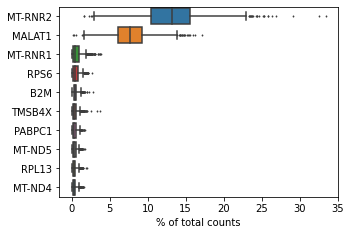

In [5]:
# Top 10 highly expressed genes

sc.pl.highest_expr_genes(adata, n_top = 10)

In [6]:
# 1 - Annotating mitochondrial genes
# 2 - Calculating qc metrics

adata.var["mt"] = adata.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(adata, qc_vars = ["mt"],
                          percent_top = None, log1p = False,
                          inplace = True)

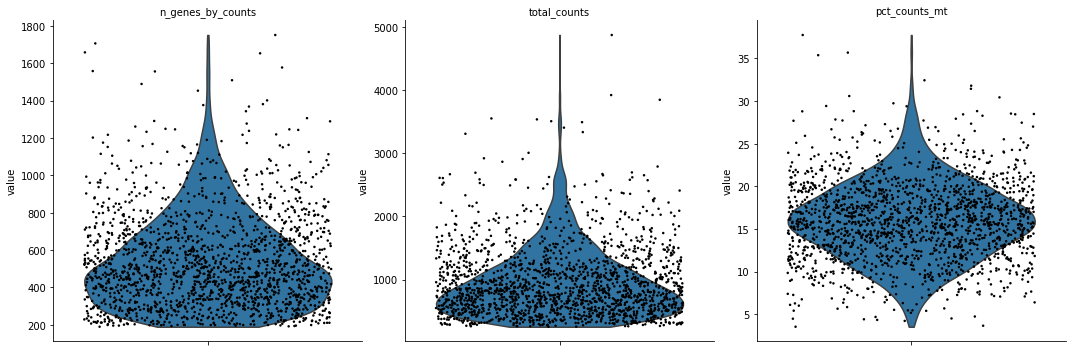

In [7]:
sc.pl.violin(adata, ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
             jitter = 0.4, multi_panel = True, size = 2.5,
            ylabel = "Value", show = True)

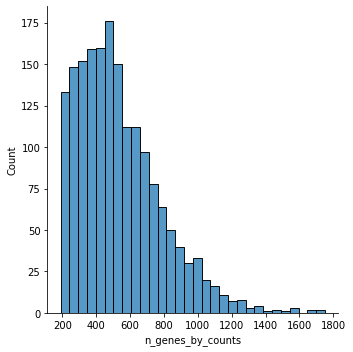

In [8]:
sns.displot(adata.obs["n_genes_by_counts"])
plt.show()

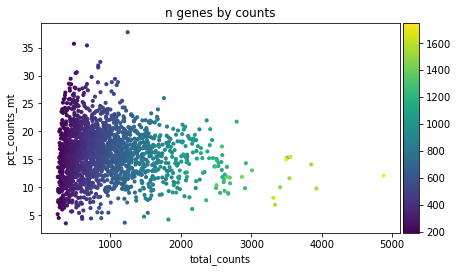

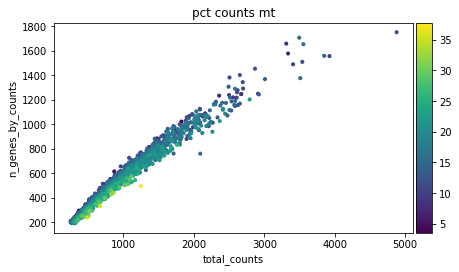

In [9]:
# Detecting outliers 

sc.pl.scatter(adata, x = "total_counts", y = "pct_counts_mt",
             color = "n_genes_by_counts")

sc.pl.scatter(adata, x = "total_counts", y = "n_genes_by_counts", 
              color = "pct_counts_mt")

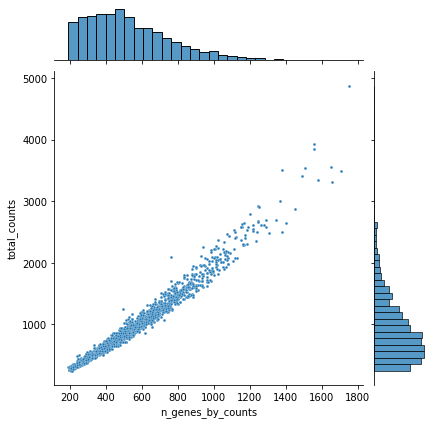

In [10]:
sns.jointplot(
    x = "n_genes_by_counts",
    y = "total_counts",
    data = adata.obs,
    kind = "scatter",
    s = 8
)
plt.show()

In [11]:
sc.pp.filter_cells(adata, min_genes = 200)
sc.pp.filter_genes(adata, min_cells = 3)

In [12]:
# Removing outliers 

bdata = adata
bdata = bdata[bdata.obs.n_genes_by_counts < 1400, :]
bdata = bdata[bdata.obs.pct_counts_mt < 30, :]

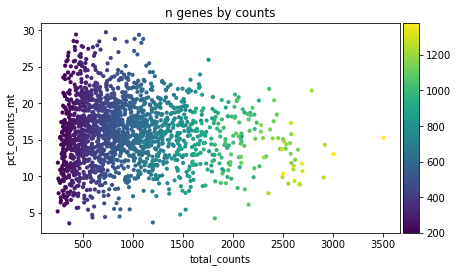

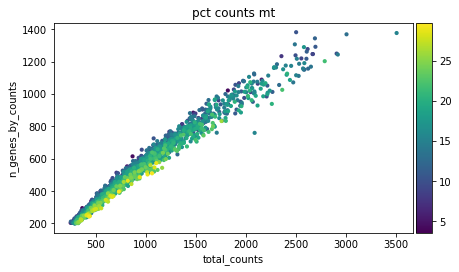

In [13]:
# Visualizinng the normal data

sc.pl.scatter(bdata, x = "total_counts", y = "pct_counts_mt",
             color = "n_genes_by_counts")

sc.pl.scatter(bdata, x = "total_counts", y = "n_genes_by_counts", 
              color = "pct_counts_mt")